In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
num_data = {
    'netifier': 7773,
    'dat': 500,
    'hsd': 13169,
    'casa': 1080,
    'hoasa': 2854,
}

In [85]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean()

def load_result(dataset, ignored_method=['comal', 'random']):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'lc-kmeans', 'lc-coreset', 'mc-kmeans', 'mc-coreset']
    result = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)
    
    for method in methods:
        for i in range (1):
            if len(method.split('-')) > 1:
                result[method] = [pd.read_csv(f"../{dataset}/metrics/combined/{dataset}-{method}-results.csv", encoding='latin-1')]
            else:
                result[method] = [pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-1-results.csv", encoding='latin-1')]

    for method in methods:
        result[method] = average_results(result[method])

    passive_result = pd.read_csv(f"../{dataset}/metrics/{dataset}-passive-results.csv")
    result['passive'] = pd.DataFrame({
        'Accuracy': [np.mean(passive_result['Accuracy']) for i in range(len(result['lc']))],
        'F1 Micro': [np.mean(passive_result['F1 Micro']) for i in range(len(result['lc']))],
        'F1 Macro': [np.mean(passive_result['F1 Macro']) for i in range(len(result['lc']))],
    })

    return result

In [86]:
def plot_results(dataset, metric='F1 Micro', ignored_method=[]):
    plt.figure(figsize=(15, 10))

    result = load_result(dataset, ignored_method=ignored_method)
    data_used = [round(x / num_data[dataset] * 100, 0) for x in result[list(result.keys())[0]]['Data Used']]

    for method in result.keys():
        if method != 'passive':
            plt.plot(data_used, result[method][metric], label=method.upper(), marker='o')
        elif metric != 'Sampling Duration':
            plt.plot(data_used, result[method][metric], label=method.upper(), linestyle='--', color='black')

    plt.title(f'{str(dataset).upper()}')
    plt.xlabel("Data Used (%)")
    plt.ylabel(metric)
    plt.legend(fontsize='x-large', loc='lower right')
    plt.grid(True, axis='x')

    plt.xticks(data_used)

    plt.tight_layout()
    plt.show()

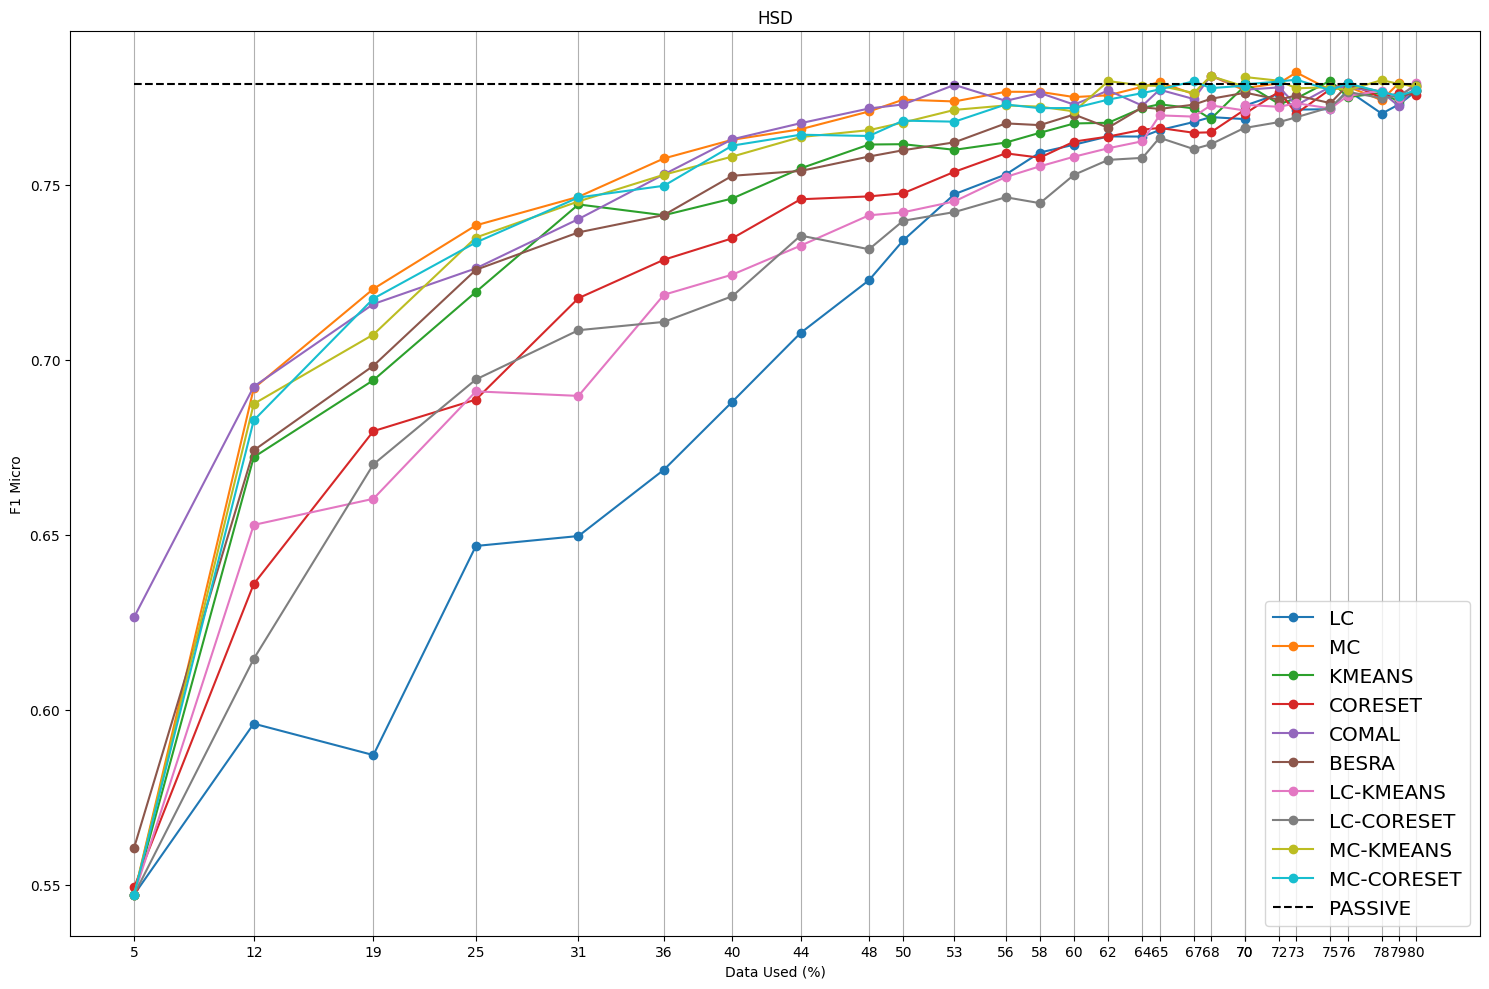

In [87]:
plot_results('hsd', ignored_method=[])

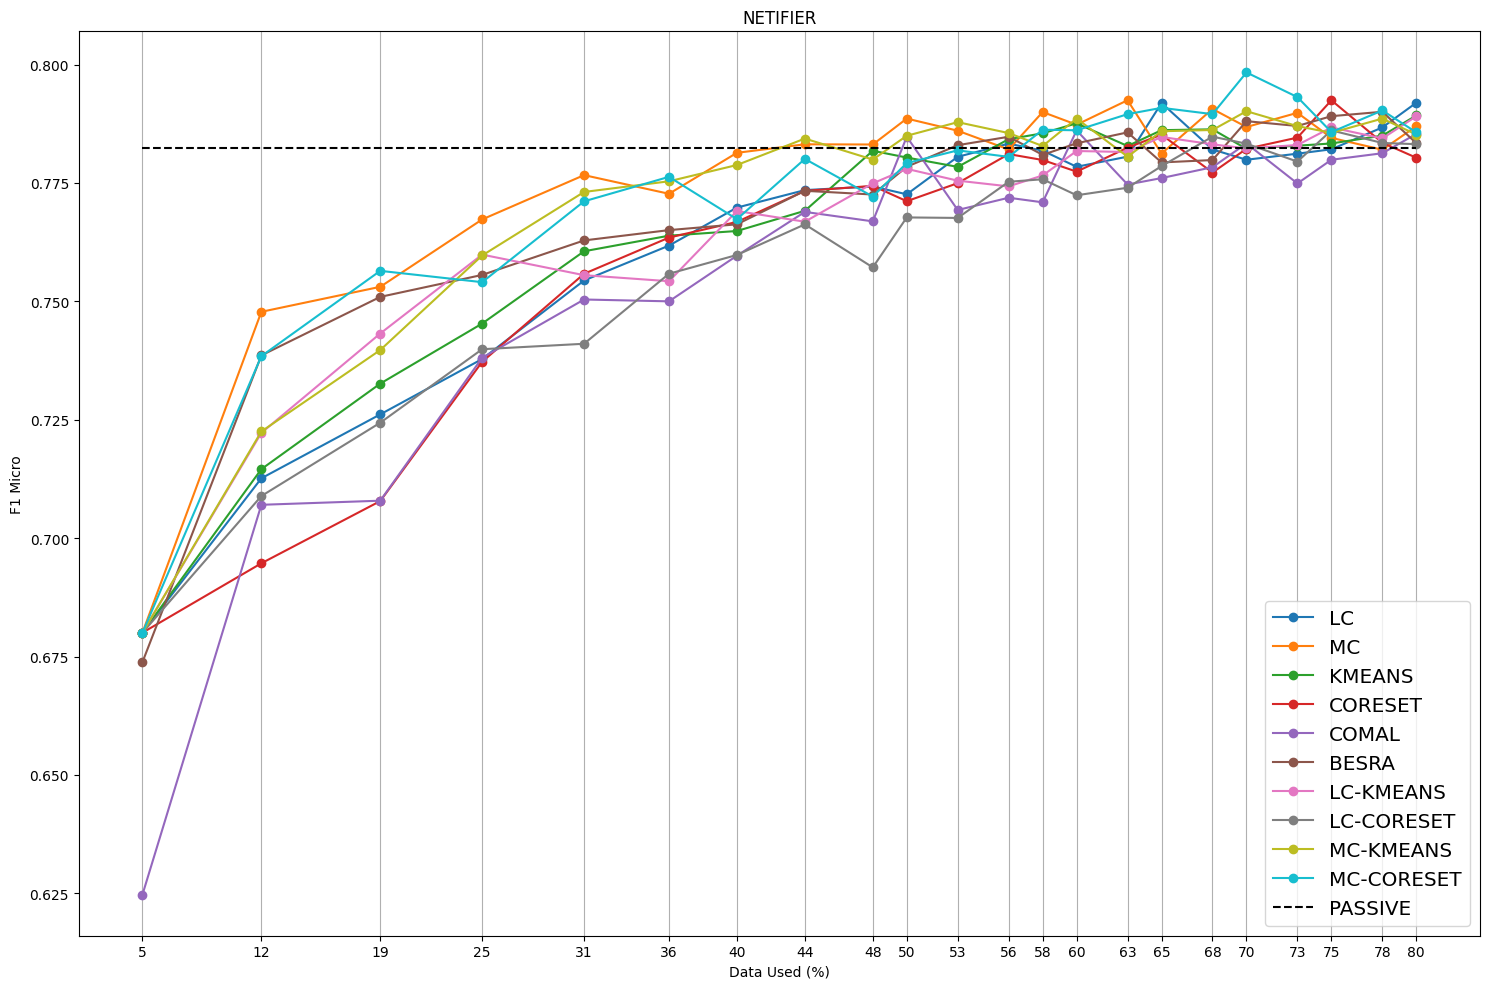

In [88]:
plot_results('netifier')

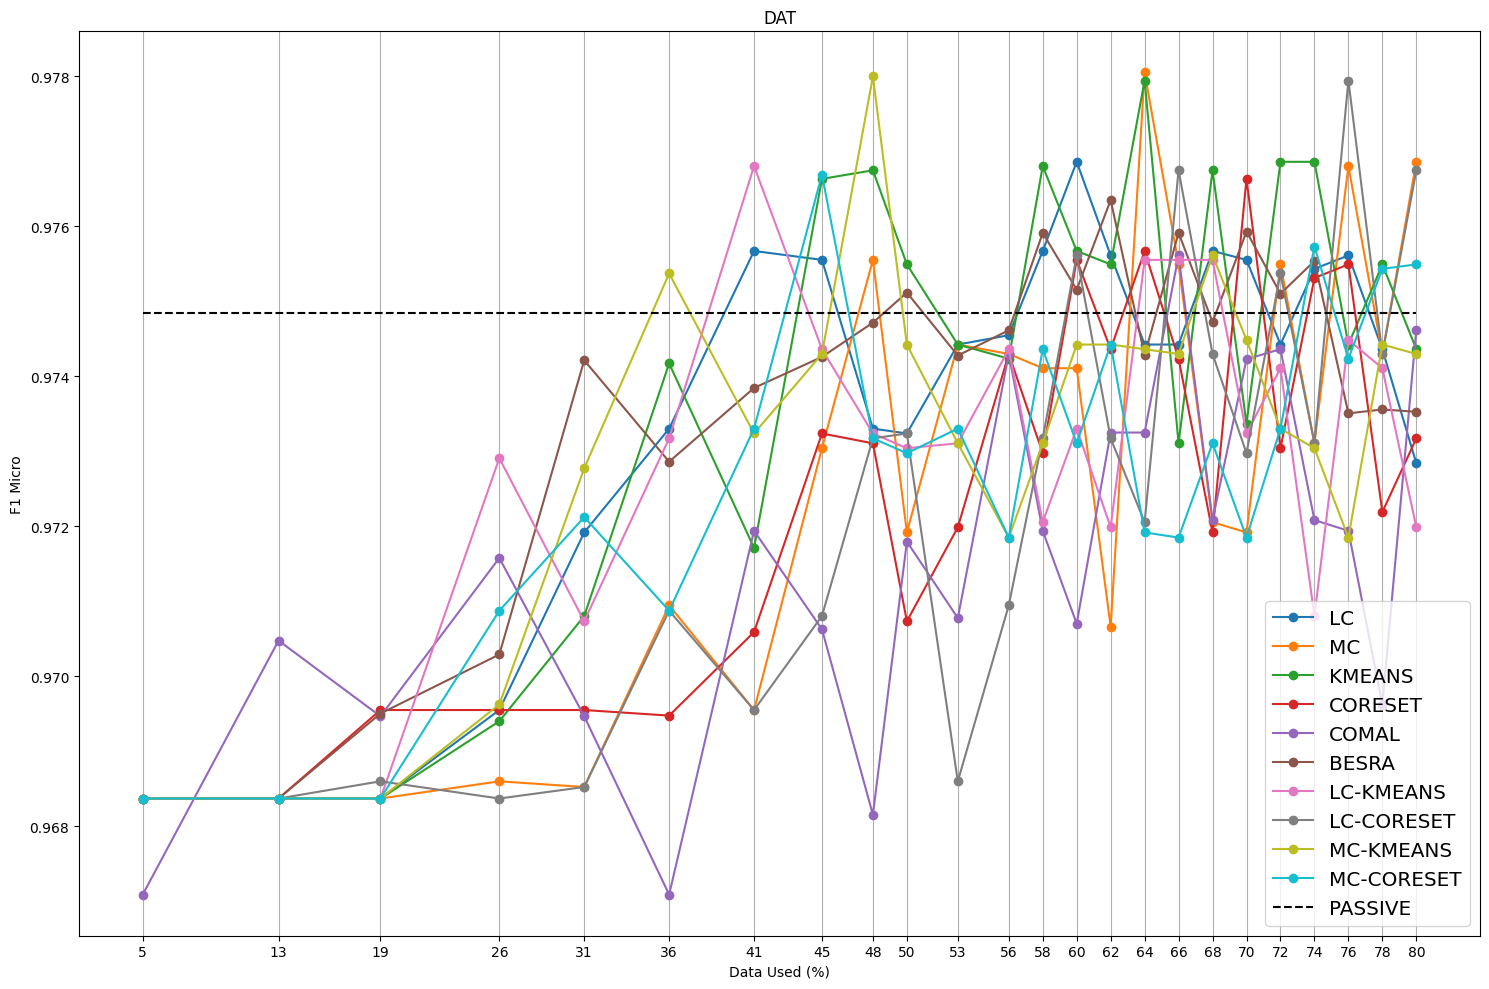

In [89]:
plot_results('dat')

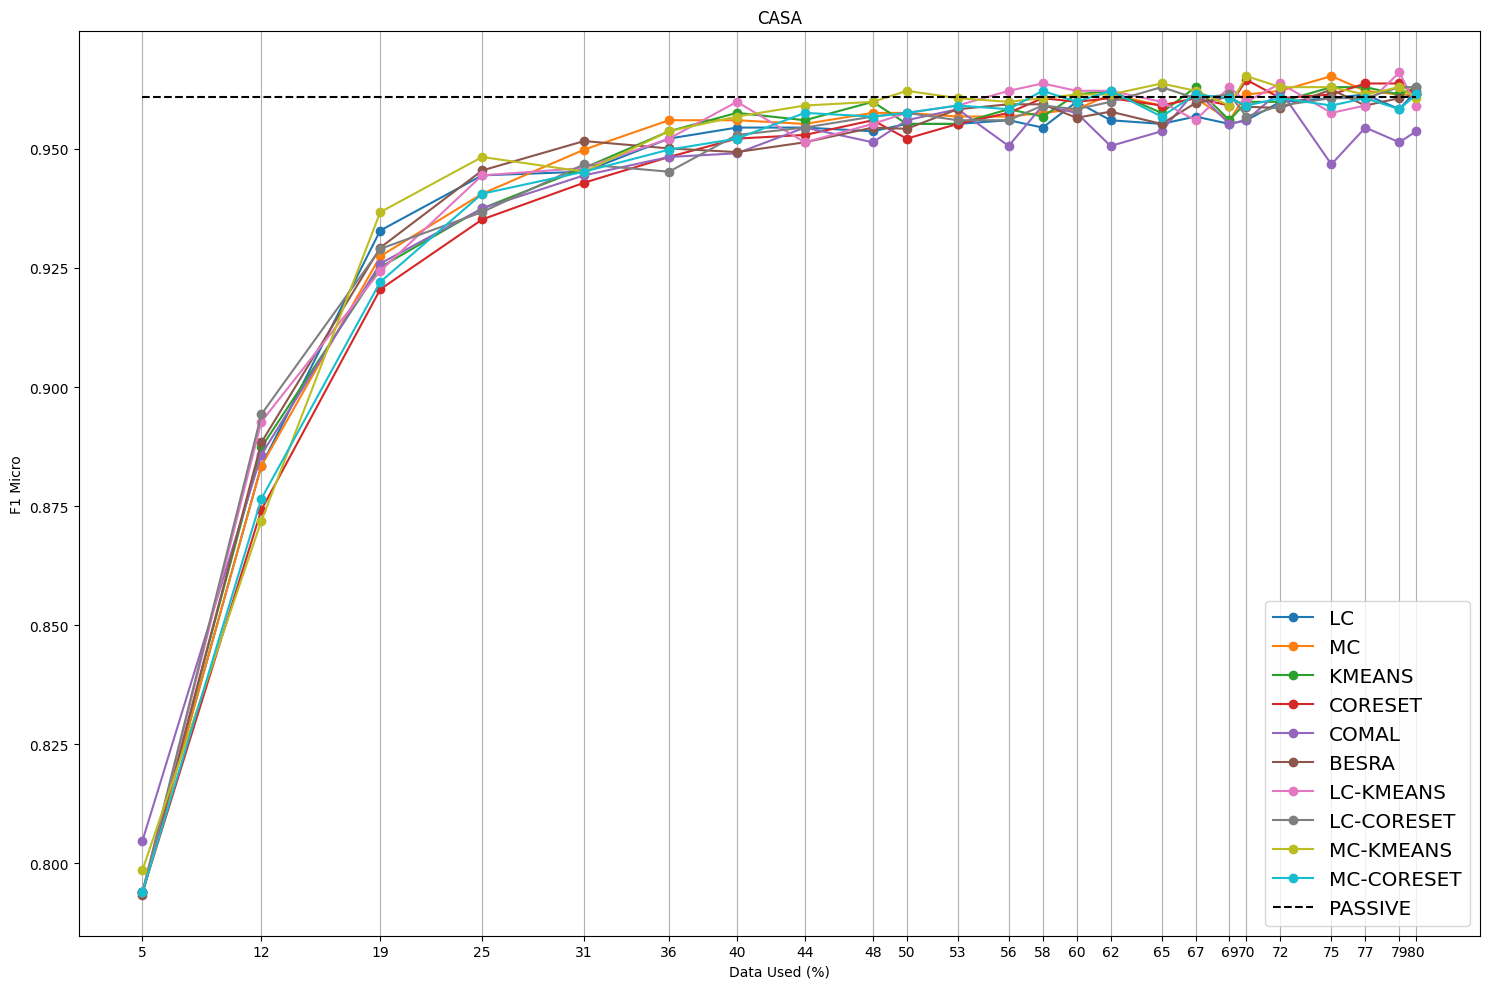

In [90]:
plot_results('casa')

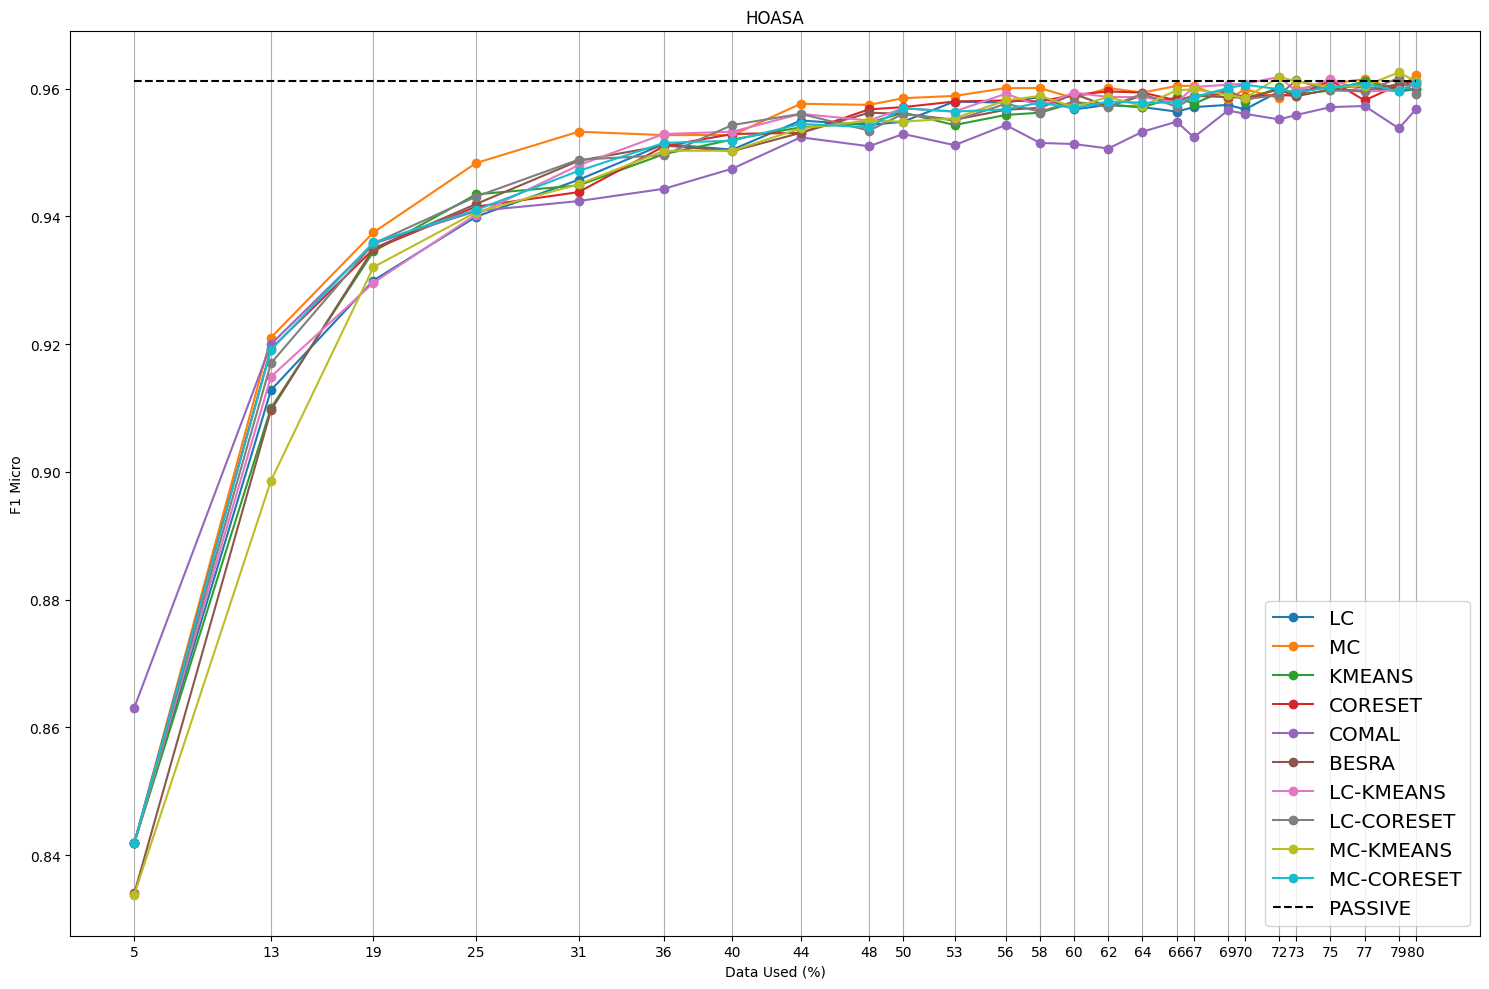

In [91]:
plot_results('hoasa')